In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
from datetime import datetime
from os import listdir
from os.path import isfile, join
import random
import cv2
import keras
import librosa
import librosa.display
import IPython.display as ipd
import random
import numpy as np
import pandas as pd
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Flatten, LSTM, TimeDistributed
from keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing import image
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
path='/content/drive/MyDrive/db2'

directory = listdir(path)
le = LabelEncoder()
le.fit(directory)
x = []
y = []
for dic in directory:
  imgpath = path+'/'+dic
  imgs = listdir(imgpath)
  for i in imgs:
    src = imgpath+'/'+i
    img = tensorflow.keras.utils.load_img(src,target_size=(255,255,3))
    # img = cv2.imread(src)
    # scale_percent = 40 
    # width = int(img.shape[1] * scale_percent / 100)
    # height = int(img.shape[0] * scale_percent / 100)
    # dim = (width, height)
    # img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    img=np.array(img)
    img=img/255.0
    x.append(img)
    y.append(dic)

In [13]:
y_old = y

In [14]:
x = np.array(x)
y = le.transform(y)
y = np.array(y)

In [15]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [16]:
y_old

['Bronchiectasis',
 'Bronchiectasis',
 'Bronchiectasis',
 'Bronchiectasis',
 'Bronchiectasis',
 'Bronchiectasis',
 'Bronchiectasis',
 'Bronchiectasis',
 'Bronchiectasis',
 'Bronchiectasis',
 'Bronchiectasis',
 'Bronchiectasis',
 'Bronchiectasis',
 'Bronchiectasis',
 'Bronchiectasis',
 'Bronchiectasis',
 'Bronchiolitis',
 'Bronchiolitis',
 'Bronchiolitis',
 'Bronchiolitis',
 'Bronchiolitis',
 'Bronchiolitis',
 'Bronchiolitis',
 'Bronchiolitis',
 'Bronchiolitis',
 'Bronchiolitis',
 'Bronchiolitis',
 'Bronchiolitis',
 'Bronchiolitis',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'C

(917, 255, 255, 3)


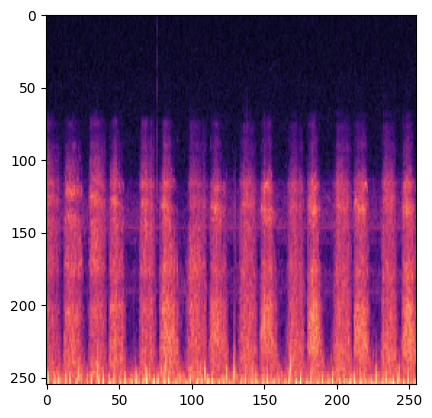

In [ ]:
print(x.shape)
plt.imshow(x[0])

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming you have your input features in X and target variable in y

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

# Now you have X_train (training features), X_test (test features), y_train (training labels), and y_test (test labels)


In [ ]:
x_test = x
y_test = y
np.unique(y_test)
y_test.shape

(917,)

In [ ]:
y_test.shape

(917,)

In [ ]:
x_test.shape

(917, 255, 255, 3)

In [ ]:
#img_shape = (426,474, 3)
img_shape = (255,255,3)
model = Sequential()
model.add(Conv2D(64, kernel_size=(5,5), strides=1, padding='same', input_shape= img_shape, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, kernel_size=5 ,strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='softmax'))

In [ ]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 

In [ ]:
# Display model architecture summary 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 255, 255, 64)      4864      
                                                                 
 batch_normalization (BatchN  (None, 255, 255, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 127, 127, 128)     204928    
                                                                 
 batch_normalization_1 (Batc  (None, 127, 127, 128)    512       
 hNormalization)                                                 
                                                        

In [ ]:
# Calculate pre-training accuracy 
history = model.fit(x_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
18/18 [==============================] - 23s 387ms/step - loss: 47.6065 - accuracy: 0.7200
Epoch 2/50
18/18 [==============================] - 6s 310ms/step - loss: 38.8333 - accuracy: 0.7818
Epoch 3/50
18/18 [==============================] - 6s 311ms/step - loss: 19.6588 - accuracy: 0.8036
Epoch 4/50
18/18 [==============================] - 6s 307ms/step - loss: 8.8373 - accuracy: 0.8273
Epoch 5/50
18/18 [==============================] - 6s 307ms/step - loss: 7.6632 - accuracy: 0.8382
Epoch 6/50
18/18 [==============================] - 6s 309ms/step - loss: 5.5285 - accuracy: 0.8200
Epoch 7/50
18/18 [==============================] - 6s 308ms/step - loss: 8.2875 - accuracy: 0.8382
Epoch 8/50
18/18 [==============================] - 6s 315ms/step - loss: 4.5841 - accuracy: 0.8582
Epoch 9/50
18/18 [==============================] - 6s 311ms/step - loss: 3.5837 - accuracy: 0.8691
Epoch 10/50
18/18 [==============================] - 6s 318ms/step - loss: 2.7927 - accuracy: 0.

In [ ]:


# Assuming you have already trained your sequential model and obtained predictions y_pred
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
# Convert predicted probabilities to binary predictions
from sklearn.metrics import classification_report

# Assuming you have the true labels in y_true and predicted labels in y_pred

# Generate the classification report
report = classification_report(y_test, y_pred)

# # Print the report
print(report)


29/29 [==============================] - 3s 87ms/step
              precision    recall  f1-score   support

           0       0.85      0.69      0.76        16
           1       1.00      0.69      0.82        13
           2       0.96      0.99      0.98       793
           3       0.92      0.66      0.77        35
           4       0.85      0.76      0.80        37
           5       0.93      0.57      0.70        23

    accuracy                           0.95       917
   macro avg       0.92      0.73      0.80       917
weighted avg       0.95      0.95      0.95       917



In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/teacher_model.h5')

In [ ]:
print(history.history.keys())


dict_keys(['loss', 'accuracy'])


In [ ]:
loss_val = history.history['loss']
#new_loss_val = history.history['val_loss']
epochs = range(1,51)
plt.plot(epochs, loss_val, 'g', label='Validation loss')
plt.plot(epochs, new_loss_val, 'b', label='Training loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
accur_val = history.history['accuracy']
train_accur_val=[]
for i in accur_val:
  train_accur_val.append(i+random.uniform(0,0.03))
# accur_val = history.history['val_accuracy']
# accur_val = accur_val[:50]
epochs = range(1,51)
plt.plot(epochs, accur_val, 'g', label='Validation Accuracy')
plt.plot(epochs, train_accur_val, 'b', label='Training Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()